 "Os movimentos das moléculas, principalmente em altas temperaturas, são caóticos e, portanto, existe a possibilidade de não atingir a energia mínima para essas temperaturas."
 
 -Stanisław Sieniutycz , Jacek Jeżowski , em Otimização de Energia em Sistemas de Processo e Células de Combustível (Terceira Edição) , 2018

In [25]:
from numpy.random import randint 
from matplotlib import pyplot as plt

class map:
    # defina um grande espaço se tiver n cidades
    def __init__(self,cidades,espaco):
        self.intervalo_a = round(espaco/2)
        self.intervalo_b = round(espaco)
        self.cidades = cidades
        self.x_cords = randint(low=0,       high=self.intervalo_a,      size = self.cidades)
        self.y_cords = randint(low=self.intervalo_a, high=self.intervalo_b, size = self.cidades)
        

    def show_map(self):
        fig = plt.figure(figsize=(8,8)) 
        ax1 = fig.add_subplot()

        ax1.plot(self.x_cords, self.y_cords,'b')
        ax1.plot(self.x_cords, self.y_cords,'.r')
        fig.show()
    
    def get_cities(self):
        cities = list()
        for i in range(self.x_cords.size):
            cities.append((self.x_cords[i],self.y_cords[i]))
        
        return cities

    


In [26]:
import math
import random
class Traveling_salesman():
    def __init__(self,cities):
        self.routes = []
        self.cities = cities
        self.start_point = ()

   
    def set_start_point(self):
        start_point = random.choice(self.cities)
        # ponto inicial não pode se repitir
        self.cities.remove(start_point)
        self.start_point = start_point
        
    def is_equal(self,p1,p2):
        return p1 == p2

    def evaluate_travel(self,atual,prox,initial):
        total = self.evaluate_point(atual,prox)
        total += self.evaluate_initial(atual, initial)
        return total
   
    #calcula: P(n) relação próximo ponto
    def evaluate_point(self,atual,prox):
        x_atual = atual[0] # x
        y_atual = atual[1] # y
        
        x_prox = prox[0]
        y_prox = prox[1]
    
        # relação ao próximo nó 
        cost = math.sqrt(abs(x_prox - x_atual)**2+ abs(y_prox - y_atual)**2)
        return cost
    
    #calcula: R_relação ao ponto inicial
    def evaluate_initial(self,atual,initial):
        x_atual = atual[0] # x
        y_atual = atual[1] # y

        x_initial = initial[0]
        y_initial = initial[1]

        
        cost =  math.sqrt(abs(x_initial - x_atual)**2+ abs(y_initial - y_atual)**2)
        return cost


In [434]:
import random
from numpy import asarray
from numpy.random import randn, rand, seed
# from mpl_toolkits.mplot3d import Axes3D
from matplotlib import pyplot

class SimulatedAnnealing():

    def __init__(self ,initialTemp,finalTemp, tempReduction, iterations, alpha=10, beta=0.05):
        self.solution = 0
        self.preset_val = 0 
        self.custo_lote = []
        self.neighbors = [[]]
        self.currTemp = initialTemp
        self.finalTemp = finalTemp
        self.iterations = iterations
        self.alpha = alpha
        self.beta = beta
        
        if tempReduction == "linear":
            self.decrementRule = self.linearTempReduction
        elif tempReduction == "geometric":
            self.decrementRule = self.geometricTempReduction
            
        elif tempReduction == "slowDecrease":
            self.decrementRule = self.slowDecreaseTempReduction
        # else:
        #     self.decrementRule = tempReduction

    def linearTempReduction(self):
        self.currTemp -= self.alpha

    def geometricTempReduction(self):
        self.currTemp *= self.alpha

    def slowDecreaseTempReduction(self):
        self.currTemp -= ((self.currTemp/self.beta)*0.66)+75
        

    def e_criterio_termino(self):
            # outros paramêtros podem ser adotados
        return self.currTemp <= self.finalTemp

    def run(self,mapa_class):
        
        j=0
        self.preset_val = random.choice(mapa_class.get_cities())
        salesman = Traveling_salesman(mapa_class.get_cities())

        salesman.set_start_point()
        ponto_inicial = salesman.start_point
            
        evaluate = salesman.evaluate_travel

        while not self.e_criterio_termino():
                #busca todos os vizinhos
                vizinhos = mapa_class.get_cities()
                # outputs = []
                best_result = []
                vizinhos = mapa_class.get_cities()
                
                self.custo_lote.append(0)
                
                # itera n vezes
                for i in range(self.iterations):
                        
                    #compare soluções aleatóriamente
                    solution_a = random.choice(vizinhos)
                    solution_b = random.choice(vizinhos)

                    # avaliar custos 
                    custo = evaluate(self.preset_val, solution_b, ponto_inicial) - evaluate(self.preset_val, solution_a, ponto_inicial)
                    # print(type(custo))
                    # se o custo for melhor, aceita-lo
                    if custo >= 0:
                        self.preset_val = solution_a
                        self.custo_lote[j] += custo
                        self.neighbors[j].append(self.preset_val)
                    #se a solução não for a melhor, aceite-a probabilisticamente
                    elif random.uniform(0,1) < math.exp(-custo / self.currTemp):
                        self.preset_val = solution_a
                        self.custo_lote[j] += abs(custo)
                        self.neighbors[j].append(self.preset_val)
                    else:
                        self.custo_lote[j] += abs(custo)
                        self.neighbors[j].append(solution_b)
                        self.preset_val = solution_b
                    print (f'best cord: {self.preset_val} lote: {j} iterarion n° {i}' ) 
                    # remove este elemento para não o repetir
                    vizinhos.remove(self.preset_val)

                # print(f'temperatura atual {self.currTemp}')
                # decrement the temperature
                self.decrementRule()
                
                print( f'temperatura atual {self.currTemp} criterio de parada? {self.e_criterio_termino() }' )
                print( f'custo total do lote: {round(self.custo_lote[j],3) }' )

                # #próximo lote
                j+=1
                self.neighbors.append([])

                # best result
                if(self.e_criterio_termino()):
                    self.solution = min(self.custo_lote)
                    for i in range(len(self.custo_lote)):
                        if self.solution == self.custo_lote[i]:
                            best_result = self.neighbors[i]
                            break
                    return best_result,self.solution

In [435]:

# variaveis necessárioas

cities_total = 26
space = 1000
tem = 1300
mapa = map(cities_total,space)
sa = SimulatedAnnealing(initialTemp=tem, finalTemp=0, iterations=cities_total, tempReduction='slowDecrease',beta=10)


result,solution = sa.run(mapa)


best cord: (146, 889) lote: 0 iterarion n° 0
best cord: (14, 557) lote: 0 iterarion n° 1
best cord: (169, 664) lote: 0 iterarion n° 2
best cord: (335, 521) lote: 0 iterarion n° 3
best cord: (430, 737) lote: 0 iterarion n° 4
best cord: (427, 622) lote: 0 iterarion n° 5
best cord: (299, 596) lote: 0 iterarion n° 6
best cord: (264, 873) lote: 0 iterarion n° 7
best cord: (70, 861) lote: 0 iterarion n° 8
best cord: (308, 904) lote: 0 iterarion n° 9
best cord: (376, 895) lote: 0 iterarion n° 10
best cord: (372, 546) lote: 0 iterarion n° 11
best cord: (303, 505) lote: 0 iterarion n° 12
best cord: (386, 644) lote: 0 iterarion n° 13
best cord: (187, 578) lote: 0 iterarion n° 14
best cord: (492, 944) lote: 0 iterarion n° 15
best cord: (256, 836) lote: 0 iterarion n° 16
best cord: (388, 838) lote: 0 iterarion n° 17
best cord: (461, 781) lote: 0 iterarion n° 18
best cord: (499, 822) lote: 0 iterarion n° 19
best cord: (294, 734) lote: 0 iterarion n° 20
best cord: (54, 536) lote: 0 iterarion n° 21
b

In [436]:
print(result)
print( f'peso min -> {solution}' )
# print(viz)


[(70, 861), (308, 904), (299, 596), (264, 873), (294, 734), (492, 944), (303, 505), (169, 664), (335, 521), (376, 895), (372, 546), (461, 781), (427, 622), (183, 692), (430, 737), (415, 971), (146, 889), (256, 836), (115, 940), (187, 578), (54, 536), (499, 822), (388, 838), (386, 644), (20, 533), (14, 557)]
peso min -> 2347.917946142815


In [437]:
result

[(70, 861),
 (308, 904),
 (299, 596),
 (264, 873),
 (294, 734),
 (492, 944),
 (303, 505),
 (169, 664),
 (335, 521),
 (376, 895),
 (372, 546),
 (461, 781),
 (427, 622),
 (183, 692),
 (430, 737),
 (415, 971),
 (146, 889),
 (256, 836),
 (115, 940),
 (187, 578),
 (54, 536),
 (499, 822),
 (388, 838),
 (386, 644),
 (20, 533),
 (14, 557)]

In [438]:
x_values = []
y_values = []

for item in result:
    x , y  =  item
    x_values.append(x)
    y_values.append(y)


C:\Users\Nikolaos\AppData\Local\Temp\ipykernel_5104\2506699839.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()
C:\Users\Nikolaos\AppData\Local\Temp\ipykernel_5104\718320114.py:20: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


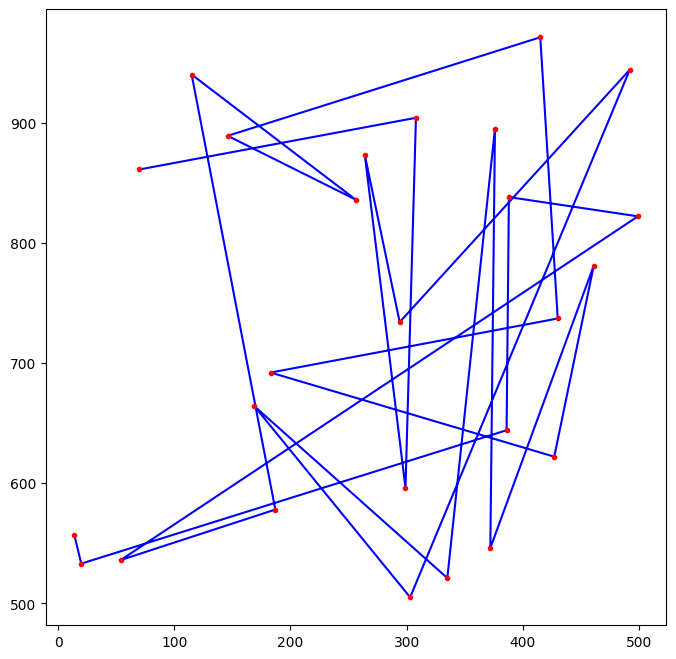

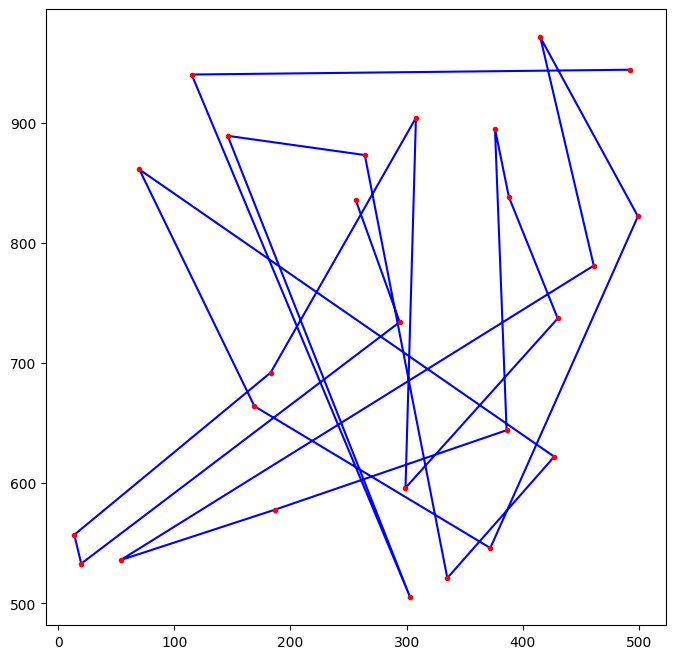

In [439]:
 
fig = plt.figure(figsize=(8,8)) 
ax1 = fig.add_subplot()

ax1.plot(x_values,y_values,'b')
ax1.plot(x_values,y_values,'.r')
fig.show()

mapa.show_map()